In [57]:
import pysam
import numpy as np
import cPickle as pickle

In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from collections import Counter

In [60]:
import matplotlib.pyplot as plt

In [61]:
from pyUMI.umiViews import tag_based_generator, field_based_generator

In [62]:
import logging
logging.basicConfig(level=logging.INFO)

In [63]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_AAAACT.bam","rb")

In [66]:
st.reset()
reads = st.fetch(until_eof=True)

In [67]:
g1 = tag_based_generator(st, 'NH', [1], False)
A = {}
for g in g1:
    ge = None
    if g.has_tag('GE'):
        ge = g.get_tag('GE')
    if g.query_name in A:
        A[g.query_name].append(ge)
    else:
        A.update({g.query_name:[ge]})

In [68]:
A

{'HISEQ:280:C9J9KANXX:2:1214:9088:80078': ['L1_Mus3_dup47117',
  None,
  'ENSMUSG00000079435'],
 'HISEQ:280:C9J9KANXX:2:2304:10492:25551': [None, None, None],
 'HISEQ:280:C9J9KANXX:1:1305:17711:18501': ['ENSMUSG00000078713', None],
 'HISEQ:280:C9J9KANXX:2:2114:6595:32245': ['ENSMUSG00000082874',
  'ENSMUSG00000012405',
  None,
  'ENSMUSG00000061167'],
 'HISEQ:280:C9J9KANXX:2:1307:1159:33959': ['ENSMUSG00000022982',
  'ENSMUSG00000047905'],
 'HISEQ:280:C9J9KANXX:1:2215:20009:59359': ['ENSMUSG00000091086',
  'ENSMUSG00000057605',
  'ENSMUSG00000084106',
  'ENSMUSG00000029614'],
 'HISEQ:280:C9J9KANXX:1:2106:9172:43568': ['ENSMUSG00000015120',
  'ENSMUSG00000062846'],
 'HISEQ:280:C9J9KANXX:2:2201:13628:86161': ['ENSMUSG00000012405',
  None,
  'ENSMUSG00000061167'],
 'HISEQ:280:C9J9KANXX:2:2107:5587:49983': ['B2_Mm1a_dup10620',
  'B2_Mm1a_dup11160',
  'B2_Mm1a_dup11541',
  'B2_Mm1a_dup11684',
  'B2_Mm1a_dup15761',
  None,
  'B2_Mm1t_dup22369',
  'B2_Mm1a_dup18061',
  'B2_Mm1a_dup127',
  'B2

In [69]:
B = {}
for k in A:
    if not None in A[k]:
        B.update({k:A[k]})

In [ ]:
B

In [70]:
def repeat_family(genes):
    families = []
    for gene in genes:
        prefix = gene[:gene.rfind('dup') -1]
        families.append(prefix)
    return families

In [71]:
def separate_genes(genes):
    g = []
    r = []
    for gene in genes:
        if 'ENSMUS' in gene:
            g.append(gene)
        else:
            r.append(gene)
    return r, g

In [72]:
C = {}
D = {}
for item in B:
    r, g = separate_genes(B[item])
    rf = len(Counter(repeat_family(r)).keys())
    gf = len(Counter(g).keys())
    C.update({item:gf})
    D.update({item:rf})

In [84]:
R2 = {}

for item in B:
    r, g = separate_genes(B[item])
    rep_fams = repeat_family(r)
    x = Counter(rep_fams)
    if len(x)==2 :
        i,j = sorted(x.items())[0]
        w,z = sorted(x.items())[1]
        rep_tuple = (i,w)
        cnt_tuple = (j,z)
        if rep_tuple in R2:
            R2[rep_tuple] = tuple(map(operator.add, R2[rep_tuple], cnt_tuple))
        else:
            R2.update({rep_tuple:cnt_tuple})


In [99]:
a = sorted([sum(item) for item in R2.values()], reverse=True)[:10]
a

[224690, 70720, 38989, 32668, 27831, 17045, 13748, 10079, 8524, 6424]

In [101]:
for item in R2:
    if sum(R2[item]) > 6423:
        print item, R2[item]

('B2_Mm1a', 'B2_Mm1t') (138964, 85726)
('MMETn-int', 'RMER16A2') (6309, 115)
('MuLV-int', 'RLTR4_MM-int') (605, 9474)
('ERVB7_1-LTR_MM', 'RLTRETN_Mm') (27747, 4921)
('B2_Mm1a', 'B2_Mm2') (28218, 10771)
('ETnERV-int', 'MMETn-int') (7153, 20678)
('B1_Mus1', 'B1_Mus2') (4233, 4291)
('B2_Mm1t', 'B2_Mm2') (42129, 28591)
('L1Md_Gf', 'L1Md_T') (1026, 12722)
('B2_Mm', 'B2_Mm1t') (536, 16509)


In [86]:
rep_fam1 = []
rep_fam2 = []
for item in B:
    r, g = separate_genes(B[item])
    rfs = Counter(repeat_family(r))
    if len(rfs) == 1:
        rep_fam1.append(rfs.keys())
    if len(rfs) == 2:
        rep_fam2.append(rfs.keys())

In [87]:
rep_fam1_m = list(chain.from_iterable(rep_fam1))
rep_fam2_m = list(chain.from_iterable(rep_fam2))

In [35]:
len(rep_fam1_m)

99407

In [36]:
len(rep_fam2_m)

110608

In [88]:
from operator import itemgetter

In [89]:
a = sorted(Counter(rep_fam1_m).items(), key=itemgetter(1), reverse=True)[:10]
b = sorted(Counter(rep_fam2_m).items(), key=itemgetter(1), reverse=True)[:10]

In [90]:
a

[('B2_Mm1a', 35778),
 ('B2_Mm1t', 17953),
 ('B2_Mm2', 10925),
 ('L1_Mus2', 8967),
 ('Lx5', 4876),
 ('L1_Mus1', 3200),
 ('L1Md_F2', 2062),
 ('MMETn-int', 2048),
 ('L1_Mur2', 1437),
 ('L1Md_T', 1328)]

In [37]:
data1 = [j for i,j in a[:5]]
data1.insert(len(data1), len(rep_fam1_m) - sum(data1))
labels1 = [i for i,j in a[:5]]
labels1.insert(len(labels1), 'Others')

In [54]:
data2 = [j for i,j in b[:5]]
data2.insert(len(data2), len(rep_fam2_m) - sum(data2))
labels2 = [i for i,j in b[:5]]
labels2.insert(len(labels2), 'Others')

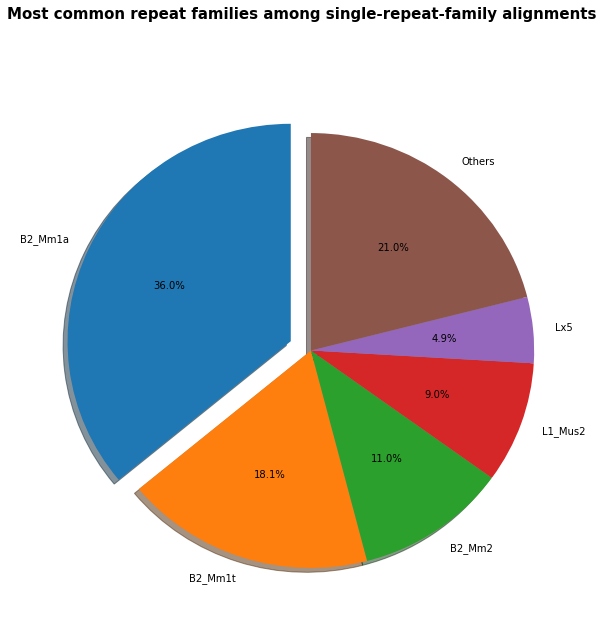

In [53]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Most common repeat families among single-repeat-family alignments', fontsize=15, fontweight='bold')
plt.pie(data1, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
explode = (0.1, 0, 0, 0, 0, 0)
plt.savefig('rep_family1.png')

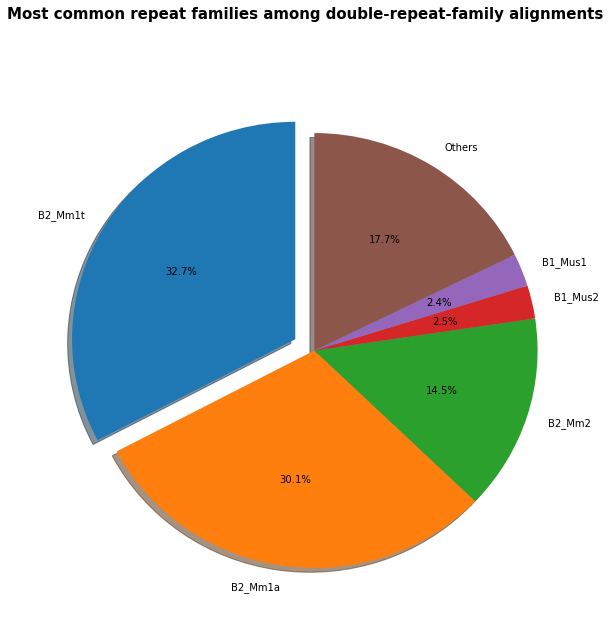

In [55]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Most common repeat families among double-repeat-family alignments', fontsize=15, fontweight='bold')
plt.pie(data2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
explode = (0.1, 0, 0, 0, 0, 0)
plt.savefig('rep_family2.png')

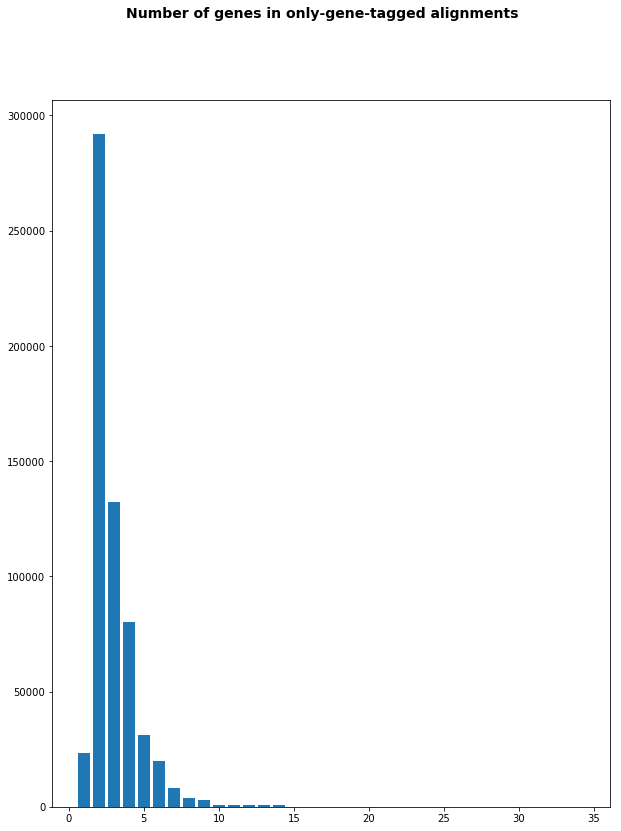

In [16]:
n_genes = [i for i in C.values()]
bng = Counter(n_genes)
bng.pop(0)
fig = plt.figure(figsize=(10,13))
fig.suptitle('Number of genes in only-gene-tagged alignments', fontsize=14, fontweight='bold')

plt.bar(bng.keys(), bng.values(), align='center');
plt.savefig('t1')

In [15]:
bng

Counter({0: 148967,
         1: 23196,
         2: 292003,
         3: 132028,
         4: 80102,
         5: 30949,
         6: 19803,
         7: 8134,
         8: 3827,
         9: 2800,
         10: 678,
         11: 921,
         12: 789,
         13: 896,
         14: 578,
         15: 26,
         16: 27,
         17: 9,
         34: 1})

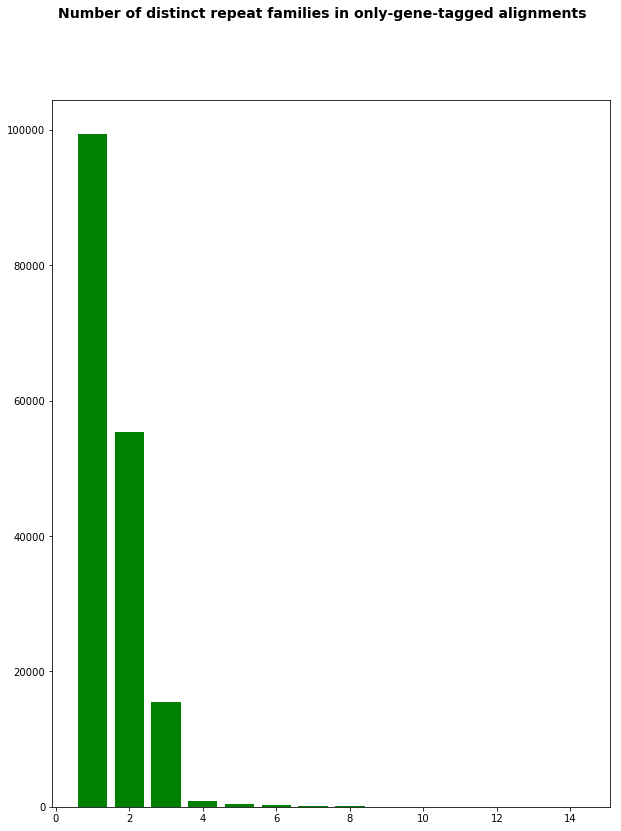

In [17]:
n_repeats = [i for i in D.values()]
rng = Counter(n_repeats)
rng.pop(0)
fig = plt.figure(figsize=(10,13))
fig.suptitle('Number of distinct repeat families in only-gene-tagged alignments', fontsize=14, fontweight='bold')
plt.bar(rng.keys(), rng.values(), align='center', color='g');
plt.savefig('t2')

--------------------------------

In [9]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_GACCGC.bam","rb")

In [17]:
st.reset()
reads = st.fetch(until_eof=True)

In [15]:
%%time
st.reset()
reads = st.fetch(until_eof=True)
uqs = {}
for r in reads:
    if not r.is_unmapped and r.get_tag('NH') == 1:
        xm = r.get_tag('XM')
        if r.has_tag('GE') :
            g = r.get_tag('GE')
        else:
            g = None
        if xm in uqs:
            uqs[xm].append(g)
        else:
            uqs.update({xm:[g]})
        

CPU times: user 15.1 s, sys: 141 ms, total: 15.2 s
Wall time: 15.3 s


In [16]:
uqs

{'TTATTTATTG': ['ENSMUSG00000028470',
  'ENSMUSG00000028470',
  'ENSMUSG00000028470',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708'],
 'TTATTTATTC': ['ENSMUSG00000061848',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608'],
 'GATGACATGA': ['B2_Mm1t_dup10962'],
 'ATTAATAGAT': ['ENSMUSG00000037628', None, None],
 'TTATTTTACT': ['ENSMUSG00000082908',
  'ENSMUSG00000082908',
  'ENSMUSG00000082908'],
 'CGCCGTACTT': ['ENSMUSG00000018770',
  'ENSMUSG000

In [18]:
%%time
uqc = {}
for r in reads:
    if not r.is_unmapped and r.get_tag('NH') == 1:
        xm = r.get_tag('XM')
        if r.has_tag('GE') :
            g = r.get_tag('GE')
        else:
            g = r.reference_name
        if xm in uqc:
            uqc[xm].append(g)
        else:
            uqc.update({xm:[g]})

CPU times: user 15.4 s, sys: 153 ms, total: 15.6 s
Wall time: 15.6 s


In [23]:
uqc_list = []
for xm in uqc:
    uqc_list.append((xm, list(np.unique(uqc[xm]))))

In [26]:
def is_gene(str):
    if 'ENSMUS' in str:
        return True
    else:
        return False

In [74]:
def get_genes(genes):
    l = []
    for g in genes:
        if is_gene(g):
            l.append(g)
    return l

In [27]:
def is_repeat(str):
    if 'dup' in str:
        return True
    else:
        return False

In [93]:
def get_repeats(genes):
    l = []
    for g in genes:
        if is_repeat(g):
            l.append(g)
    return l

In [53]:
def is_ref(str):
    if 'chr' in str:
        return True
    else:
        return False

In [101]:
def get_refs(genes):
    l = []
    for g in genes:
        if is_ref(g):
            l.append(g)
    return l

----------------------------------

In [28]:
l1 = [(i, len(j)) for i,j in uqc_list]
l2 = [j for i,j in l1]
l3 = [(i, len(get_genes(j))) for i,j in uqc_list if get_genes(j)]
l4 = [j for i,j in l3]
l5 = [(i, len(get_repeats(j))) for i,j in uqc_list if get_repeats(j)]
l6 = [(i, len(get_refs(j))) for i,j in uqc_list if get_refs(j)]

In [30]:
d1 = Counter(l2)
d2 = Counter(l4)
d3 = Counter([j for i,j in l5])
d4 = Counter([j for i,j in l6])

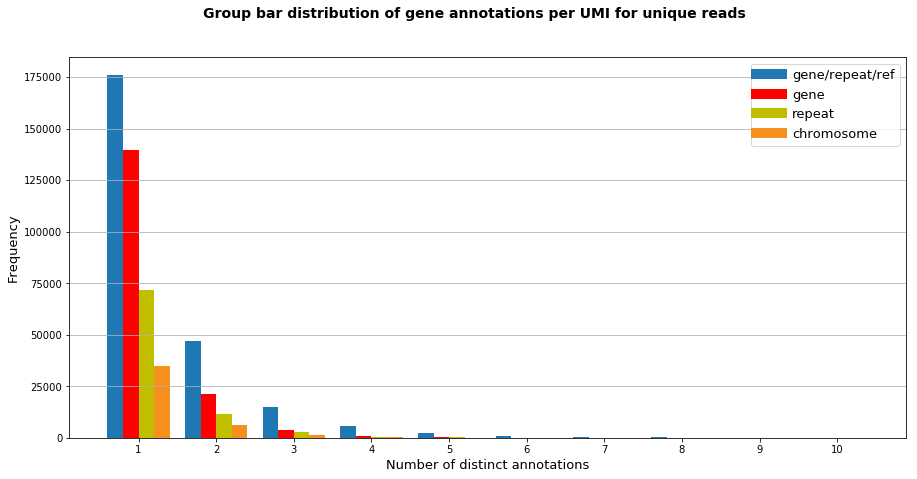

In [236]:
# Setting the positions and width for the bars
pos = list(range(1,11,1))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Group bar distribution of gene annotations per UMI for unique reads', fontsize=14, fontweight='bold')

#create legends
l1 = plt.axhline(y=0.8, linewidth=10)
l2 = plt.axhline(y=0.8, linewidth=10, color='r')
l3 = plt.axhline(y=0.8, linewidth=10, color='y')
l4 = plt.axhline(y=0.8, linewidth=10, color='#F78F1E')
l1.remove()
l2.remove()
l3.remove()
l4.remove()
plt.legend([l1, l2, l3, l4], ["gene/repeat/ref", "gene", "repeat", "chromosome"], fontsize= 13, loc=1)


y1 = sorted(d1.values()[:10], reverse=True)
y2 = sorted(d2.values()[:10], reverse=True)
y3 = d3.values()[:10]
y4 = d4.values()[:10]
# Create a bar with pre_score data,
# in position pos,
plt.bar([p - width for p in pos], y1, width)
plt.bar(pos, y2, width, color='r')
plt.bar([p + width*2 for p in pos], y3, width, color='#F78F1E')
plt.bar([p + width for p in pos], y4, width, color='y')
plt.xticks([i + 0.1 for i in pos])
ax.set_xticklabels(pos)
ax.yaxis.grid()

plt.xlabel('Number of distinct annotations' , fontsize=13)
plt.ylabel('Frequency', fontsize=13)

#plt.grid()
#plt.show()
plt.savefig('UMI_gdist_uniq')

In [134]:
%%time
mqs = {}
st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if not r.is_unmapped and r.get_tag('NH') > 1:
        xm = r.get_tag('XM')
        if r.has_tag('GE') :
            g = r.get_tag('GE')
        else:
            g = r.reference_name
        if xm in mqs:
            mqs[xm].append(g)
        else:
            mqs.update({xm:[g]})

CPU times: user 22.7 s, sys: 268 ms, total: 23 s
Wall time: 23 s


In [137]:
mqc_list = []
for xm in mqs:
    mqc_list.append((xm, list(np.unique(mqs[xm]))))

In [140]:
m1 = [(i, len(j)) for i,j in mqc_list]
m2 = [j for i,j in m1]
md1 = Counter(m2)
m3 = [(i, len(get_genes(j))) for i,j in mqc_list if get_genes(j)]
m4 = [j for i,j in m3]
md2 = Counter(m4)
m5 = [(i, len(get_repeats(j))) for i,j in mqc_list if get_repeats(j)]
md3 = Counter([j for i,j in m5])
m6 = [(i, len(get_refs(j))) for i,j in mqc_list if get_refs(j)]
md4 = Counter([j for i,j in m6])

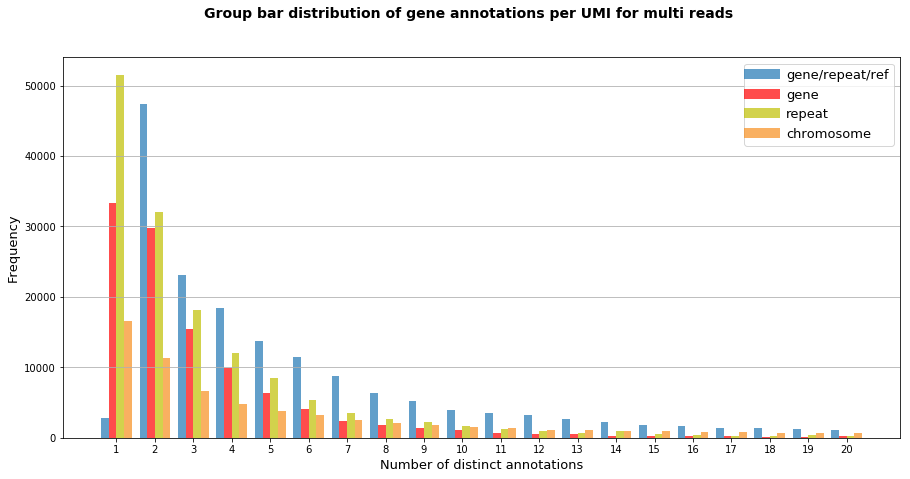

In [239]:
# Setting the positions and width for the bars
pos = list(range(1,21,1))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Group bar distribution of gene annotations per UMI for multi reads', fontsize=14, fontweight='bold')

#create legends
l1 = plt.axhline(y=0.8, linewidth=10, alpha=0.7)
l2 = plt.axhline(y=0.8, linewidth=10, color='r', alpha=0.7)
l3 = plt.axhline(y=0.8, linewidth=10, color='y', alpha=0.7)
l4 = plt.axhline(y=0.8, linewidth=10, color='#F78F1E', alpha=0.7)
l1.remove()
l2.remove()
l3.remove()
l4.remove()
plt.legend([l1, l2, l3, l4], ["gene/repeat/ref", "gene", "repeat", "chromosome"], fontsize= 13, loc=1)


y1 = md1.values()[:20]
y2 = md2.values()[:20]
y3 = md3.values()[:20]
y4 = md4.values()[:20]
# Create a bar with pre_score data,
# in position pos,
plt.bar([p - width for p in pos], y1, width, alpha=0.7)
plt.bar(pos, y2, width, alpha=0.7, color='r')
plt.bar([p + width*2 for p in pos], y3, width, alpha=0.7, color='#F78F1E')
plt.bar([p + width for p in pos], y4, width, alpha=0.7, color='y')
plt.xticks([i + 0.1 for i in pos])
ax.set_xticklabels(pos)
ax.yaxis.grid()

plt.xlabel('Number of distinct annotations' , fontsize=13)
plt.ylabel('Frequency', fontsize=13)
#plt.grid()
#plt.show();
plt.savefig('UMI_gdist_multi');

---------------------